## Create code that processes model output into nice visualizations:

1) The files with daily cases, hospital, deaths counts across all population per districts with format output_workplaceBubblesSophie_ need to be averaged for daily trajectories
2) The files with daily cases, deaths, and in occupation by occupation (occ4) with format output_workplaceBubblesSophie_1_Economic_Status_Covid need to be averaged for daily trajectories
3) The files with daily demographics of cases and deaths by sex and gender

In [154]:
# generic packages
import os
from os.path import isfile, join
import glob
import subprocess
import re

#dataframe packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# plot packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
sns.set(style="darkgrid")

#maps
import geopandas as gpd
import plotly.express as px
import json


In [155]:

input_path = "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/model_output/a_daily_case_death_counts/"
output_path = "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/model_output/a_daily_case_death_counts/plots/"


In [156]:
# decide which version I am creating graphics for 

# Define the folder path and file prefix
folder_path = input_path


file_prefix = 'output_workplaceBubblesSophie_'
id_prefix='bubblesNorm'

# file_prefix = 'output_perfectMixingSophie_'
# id_prefix="perfMix"

file_prefix ='output_schoolToHomeSophie_'
id_prefix = "schoolToHome"

file_prefix ='output_schoolToComSophie_'
id_prefix = "schoolToCom"

file_prefix ='output_comWorkToHomeSophie_'
id_prefix = "comWorkersToHome"

file_prefix = 'output_workToHomeSophie_'
id_prefix = 'workToHome'

file_prefix = 'output_allToHomeSophie_'
id_prefix = 'allToHome'

# # ## mobility scenarios set 

file_prefix = 'output_BubblesLd_'
id_prefix = 'bubblesLd'
 
# file_prefix = 'output_BubblesLd_'
# id_prefix = 'bubblesLdv2'

file_prefix = 'output_BubblesLd1a_'
id_prefix = 'bubblesLd_1a'

file_prefix = 'output_BubblesLd1b_'
id_prefix = 'bubblesLd_1b'

file_prefix = 'output_BubblesLd2a_'
id_prefix = 'bubblesLd_2a'

file_prefix = 'output_BubblesLd2b_'
id_prefix = 'bubblesLd_2b'

file_prefix = 'output_BubblesLd3a_'
id_prefix = 'bubblesLd_3a'

file_prefix = 'output_BubblesLd3b_'
id_prefix = 'bubblesLd_3b'

### 1. Case counts version

In [157]:


# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

In [158]:
columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
r_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #r_data[['metric_died_count', 'metric_new_cases_sympt']] = r_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [159]:
#group the data by daily national cases (aggregating districts) but keeping runs independent
r_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

#r_data[['metric_died_count', 'metric_new_cases_sympt']] = r_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
r_data['metric_new_cases_sympt'] = pd.to_numeric(r_data['metric_new_cases_sympt'])
#r_data.set_index('time', inplace=True)
r_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
r_data.head()


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [161]:
#group the data by daily national cases (aggregating districts) and runs for the meanmary stats 
r2_data = r_data.groupby('time', as_index=False).mean()

r2_data['metric_new_cases_sympt'] = pd.to_numeric(r2_data['metric_new_cases_sympt'])
#r_data.set_index('time', inplace=True)
r2_data.to_csv (output_path+f'{id_prefix}_agg2_case_counts.csv')
r2_data.head()

# Find the row with the maximum value in 'Column1'
max_peak = r2_data[r2_data['metric_new_cases_sympt']==r2_data['metric_new_cases_sympt'].max()]
tot_died = r2_data[r2_data['metric_died_count']==r2_data['metric_died_count'].max()]

# Print the row
max_peak.head()
tot_died.head()

,time,run,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
99,99,5.5,1428.6,0.0,0.0,0.0,0.0,0.1,3.0,13.5


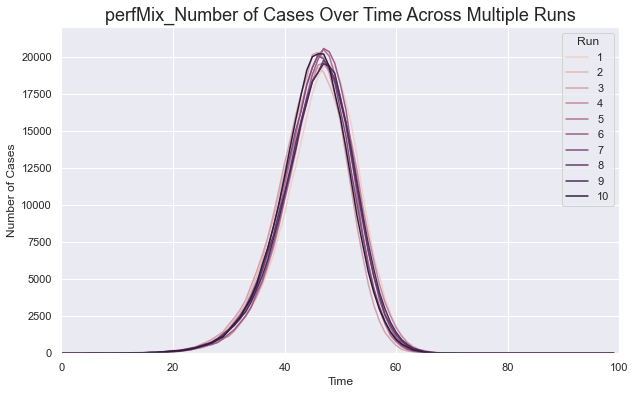

In [39]:
# Plotting the data
plt.figure(figsize=(10, 6))
# Get all unique categories in 'run' column
unique_runs = r_data['run'].unique()
sns.lineplot(data=r_data, x="time", y="metric_new_cases_sympt", hue="run", hue_order=unique_runs, err_style="band", legend="full") #, style=""


# Adding titles and labels
plt.title(f'{id_prefix}_Number of Cases Over Time Across Multiple Runs', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.legend(title='Run') 
plt.xlim(0,100)
plt.ylim(0,22000)
plt.grid(True)

# export the plot 
plt.savefig(output_path+f'{id_prefix}_cases_over_time.png', dpi=300)


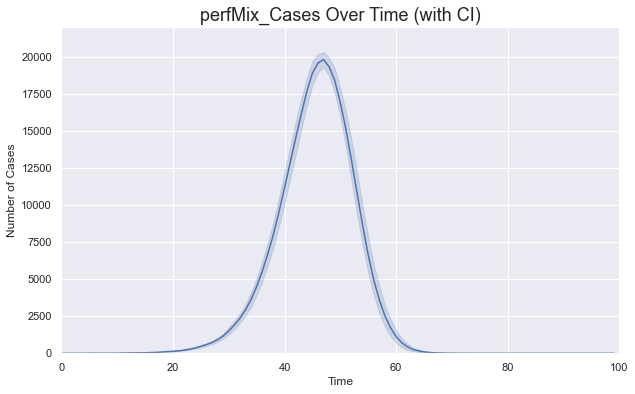

In [40]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=r_data, x="time", y="metric_new_cases_sympt", ci='sd') #, style=""


# Adding titles and labels
plt.title(f'{id_prefix}_Cases Over Time (with CI)', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xlim(0,100)
plt.ylim(0,22000)
plt.grid(True)

# export the plot 
plt.savefig(output_path+f'{id_prefix}_cases_over_time_err.png', dpi=300)


## Generating independently so I can do the single plot with multiple lines

In [41]:
stop point

SyntaxError: invalid syntax (<ipython-input-41-ad728be9f8f2>, line 1)

### Perfect Mixing 

In [42]:
# so if I make the one above bubbles


file_prefix = 'output_perfectMixingSophie_'
id_prefix="perfMix"

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
pf_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #pf_data[['metric_died_count', 'metric_new_cases_sympt']] = pf_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


pf_data.info()

pf_data['metric_new_cases_sympt'] = pd.to_numeric(pf_data['metric_new_cases_sympt'])
#pf_data.set_index('time', inplace=True)
pf_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
pf_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [43]:
## WorktoHOme

In [44]:

file_prefix = 'output_workToHomeSophie_'
id_prefix = 'workToHome'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
wTH_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #wTH_data[['metric_died_count', 'metric_new_cases_sympt']] = wTH_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


wTH_data.info()

wTH_data['metric_new_cases_sympt'] = pd.to_numeric(wTH_data['metric_new_cases_sympt'])
#wTH_data.set_index('time', inplace=True)
wTH_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
wTH_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [45]:
## comWorkToHome

In [46]:
file_prefix ='output_comWorkToHomeSophie_'
id_prefix = "comWorkersToHome"

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
cWTH_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #cWTH_data[['metric_died_count', 'metric_new_cases_sympt']] = cWTH_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


cWTH_data.info()

cWTH_data['metric_new_cases_sympt'] = pd.to_numeric(cWTH_data['metric_new_cases_sympt'])
#cWTH_data.set_index('time', inplace=True)
cWTH_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
cWTH_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [47]:
## schoolToCom

In [48]:
file_prefix ='output_schoolToComSophie_'
id_prefix = "schoolToCom"


# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
sTC_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #sTC_data[['metric_died_count', 'metric_new_cases_sympt']] = sTC_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


sTC_data.info()

sTC_data['metric_new_cases_sympt'] = pd.to_numeric(sTC_data['metric_new_cases_sympt'])
#sTC_data.set_index('time', inplace=True)
sTC_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
sTC_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [49]:
## schoolToHome

In [50]:
file_prefix ='output_schoolToHomeSophie_'
id_prefix = "schoolToHome"


# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
sTH_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #sTH_data[['metric_died_count', 'metric_new_cases_sympt']] = sTH_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


sTH_data.info()

sTH_data['metric_new_cases_sympt'] = pd.to_numeric(sTH_data['metric_new_cases_sympt'])
#sTH_data.set_index('time', inplace=True)
sTH_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
sTH_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [51]:
## allToHome

In [52]:
file_prefix ='output_allToHomeSophie_'
id_prefix = "allToHome"


# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
aTH_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #aTH_data[['metric_died_count', 'metric_new_cases_sympt']] = aTH_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


aTH_data.info()

aTH_data['metric_new_cases_sympt'] = pd.to_numeric(aTH_data['metric_new_cases_sympt'])
#aTH_data.set_index('time', inplace=True)
aTH_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
aTH_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [53]:
## bubbles default


file_prefix = 'output_workplaceBubblesSophie_'
id_prefix='bubblesNorm'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
b_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #b_data[['metric_died_count', 'metric_new_cases_sympt']] = b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


b_data.info()

b_data['metric_new_cases_sympt'] = pd.to_numeric(b_data['metric_new_cases_sympt'])
#b_data.set_index('time', inplace=True)
b_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
b_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


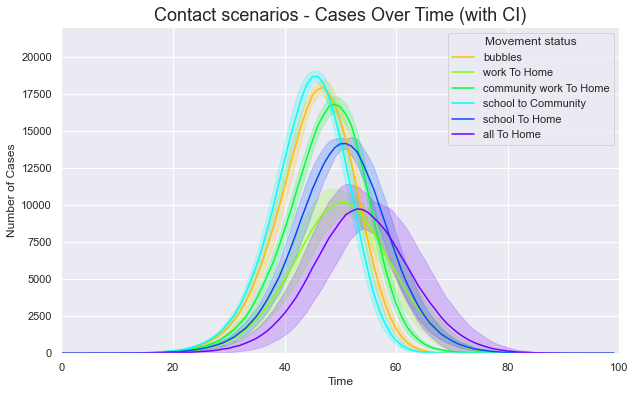

In [55]:
# Plotting the data
sns.set_palette(sns.color_palette('hsv',7))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
plt.figure(figsize=(10, 6))
# sns.lineplot(data=l_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'lockdown bubbles') #, style=""
# # Then add another line for non-lockdown
sns.lineplot(data=b_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'bubbles') #, style=""
# # Then add another line for lockdown 2
#sns.lineplot(data=pf_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'perfect mixing') #, style=""

# Add contact scenarios 
sns.lineplot(data=wTH_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'work To Home') #, style=""
sns.lineplot(data=cWTH_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'community work To Home') #, style=""
sns.lineplot(data=sTC_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'school to Community') #, style=""
sns.lineplot(data=sTH_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'school To Home') #, style=""
sns.lineplot(data=aTH_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'all To Home') #, style=""



# Adding titles and labels
plt.title('Contact scenarios - Cases Over Time (with CI)', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xlim(0,100)
plt.ylim(0,22000)
plt.grid(True)
plt.legend(title='Movement status')

# export the plot 
plt.savefig(output_path+'Cases_over_time_contact_scenarios.png', dpi=300)

## Mobility scenarios overlaid 

### Lockdown

In [377]:
# so if I make the base bubblesNorm always 

file_prefix = 'output_BubblesLd_'
id_prefix = 'bubblesLd'


# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
l_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #l_data[['metric_died_count', 'metric_new_cases_sympt']] = l_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


l_data.info()

#l_data[['metric_died_count', 'metric_new_cases_sympt']] = l_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
l_data['metric_new_cases_sympt'] = pd.to_numeric(l_data['metric_new_cases_sympt'])
#l_data.set_index('time', inplace=True)
l_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
l_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [378]:
# so if I make the one above bubbles


file_prefix = 'output_BubblesLd_'
id_prefix = 'bubblesLdv2'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
l2_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #l2_data[['metric_died_count', 'metric_new_cases_sympt']] = l2_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


l2_data.info()

#l2_data[['metric_died_count', 'metric_new_cases_sympt']] = l2_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
l2_data['metric_new_cases_sympt'] = pd.to_numeric(l2_data['metric_new_cases_sympt'])
#l2_data.set_index('time', inplace=True)
l2_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
l2_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [379]:
## Scenario 1a

In [380]:



file_prefix = 'output_BubblesLd1a'
id_prefix = 'bubblesLd_1a'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_1a_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_1a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_1a_data.info()

#s_1a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_1a_data['metric_new_cases_sympt'] = pd.to_numeric(s_1a_data['metric_new_cases_sympt'])
#s_1a_data.set_index('time', inplace=True)
s_1a_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_1a_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [381]:
## scenario 1b 

In [382]:
file_prefix = 'output_BubblesLd1b'
id_prefix = 'bubblesLd_1b'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_1b_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_1b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_1b_data.info()

#s_1b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_1b_data['metric_new_cases_sympt'] = pd.to_numeric(s_1b_data['metric_new_cases_sympt'])
#s_1b_data.set_index('time', inplace=True)
s_1b_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_1b_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        900 non-null    int64
 1   time                       900 non-null    int64
 2   metric_died_count          900 non-null    int64
 3   metric_new_hospitalized    900 non-null    int64
 4   metric_new_critical        900 non-null    int64
 5   metric_new_cases_asympt    900 non-null    int64
 6   metric_new_cases_sympt     900 non-null    int64
 7   metric_new_deaths          900 non-null    int64
 8   metric_new_recovered       900 non-null    int64
 9   metric_currently_infected  900 non-null    int64
dtypes: int64(10)
memory usage: 70.4 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [383]:
## Scenario 2a

In [384]:
file_prefix = 'output_BubblesLd2a'
id_prefix = 'bubblesLd_2a'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_2a_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_2a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_2a_data.info()

#s_2a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_2a_data['metric_new_cases_sympt'] = pd.to_numeric(s_2a_data['metric_new_cases_sympt'])
#s_2a_data.set_index('time', inplace=True)
s_2a_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_2a_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [385]:
file_prefix = 'output_BubblesLd2b'
id_prefix = 'bubblesLd_2b'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_2b_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_2b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_2b_data.info()

#s_2b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_2b_data['metric_new_cases_sympt'] = pd.to_numeric(s_2b_data['metric_new_cases_sympt'])
#s_2b_data.set_index('time', inplace=True)
s_2b_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_2b_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [386]:
file_prefix = 'output_BubblesLd3a'
id_prefix = 'bubblesLd_3a'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_3a_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_3a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_3a_data.info()

#s_3a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_3a_data['metric_new_cases_sympt'] = pd.to_numeric(s_3a_data['metric_new_cases_sympt'])
#s_3a_data.set_index('time', inplace=True)
s_3a_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_3a_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [387]:
file_prefix = 'output_BubblesLd3b'
id_prefix = 'bubblesLd_3b'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_3b_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_3b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_3b_data.info()

#s_3b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_3b_data['metric_new_cases_sympt'] = pd.to_numeric(s_3b_data['metric_new_cases_sympt'])
#s_3b_data.set_index('time', inplace=True)
s_3b_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_3b_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


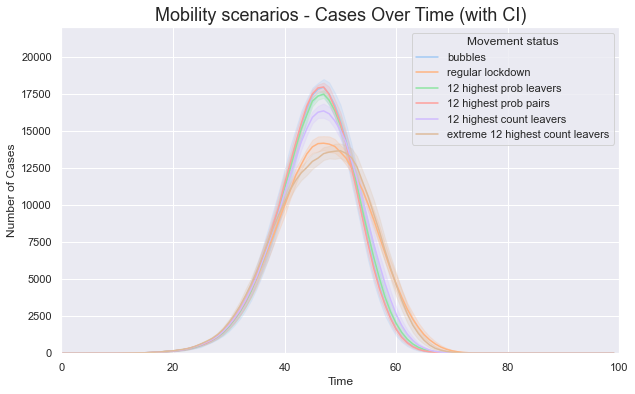

In [394]:
# Plotting the data
sns.set_palette(sns.color_palette('pastel',6))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
# Define specific color names for each line
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']


plt.figure(figsize=(10, 6))
# sns.lineplot(data=l_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'lockdown bubbles') #, style=""
# # Then add another line for non-lockdown
sns.lineplot(data=b_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'bubbles') #, style=""

# Add ld scenarios 
sns.lineplot(data=l_data, x="time", y="metric_new_cases_sympt",  label = 'regular lockdown') #, style=""
# sns.lineplot(data=l2_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'delayed lockdown') #, style=""
sns.lineplot(data=s_1a_data, x="time", y="metric_new_cases_sympt",  label = '12 highest prob leavers') #, style=""
# sns.lineplot(data=s_1b_data, x="time", y="metric_new_cases_sympt", ci='sd', label = '5 highest prob leavers') #, style=""
sns.lineplot(data=s_2a_data, x="time", y="metric_new_cases_sympt", label = '12 highest prob pairs') #, style=""
# sns.lineplot(data=s_2b_data, x="time", y="metric_new_cases_sympt", ci='sd', label = '5 highest prob pairs') #, style=""
sns.lineplot(data=s_3a_data, x="time", y="metric_new_cases_sympt",  label = '12 highest count leavers') #, style=""
sns.lineplot(data=s_3b_data, x="time", y="metric_new_cases_sympt",  label = 'extreme 12 highest count leavers') #, style=""



# Adding titles and labels
plt.title('Mobility scenarios - Cases Over Time (with CI)', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xlim(0,100)
plt.ylim(0,22000)
plt.grid(True)
plt.legend(title='Movement status')

# export the plot 
plt.savefig(output_path+'Cases_over_time_movement_scenarios.png', dpi=300)